# Problem 4: Problem 3 reimplemented in Keras

## Loading the image data

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

Using TensorFlow backend.


## Preparing the image data

In [0]:
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

## Preparing the labels

We need to categorically encode the labels.

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

## Creating the network architecture

Most of this code has already been provided for us.  The things that need to be changed is the number of input neurons, from 512 to 784, since we were told to reimplement problem 3, which had a 784 neuron input layer, and the optimizer, which is supposed to be stochastic gradient descent.

In [4]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________



## The compilation and training steps

In [5]:
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 10
history = network.fit(train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_images, test_labels))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 47us/step - loss: 1.0724 - acc: 0.7658 - val_loss: 0.5822 - val_acc: 0.8685
Epoch 2/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.5120 - acc: 0.8735 - val_loss: 0.4249 - val_acc: 0.8926
Epoch 3/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.4148 - acc: 0.8913 - val_loss: 0.3678 - val_acc: 0.9030
Epoch 4/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.3700 - acc: 0.9006 - val_loss: 0.3360 - val_acc: 0.9090
Epoch 5/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.3423 - acc: 0.9066 - val_loss: 0.3150 - val_acc: 0.9155
Epoch 6/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.3225 - acc: 0.9112 - val_loss: 0.2991 - val_acc: 0.9191
Epoch 7/10
60000/60000 [==============================] - 2s 33us/step - loss: 0

## Display the training/test loss/accuracy

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

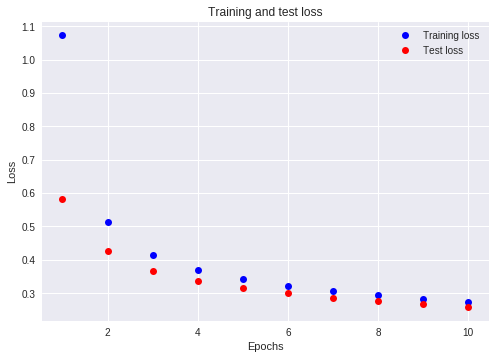

In [7]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

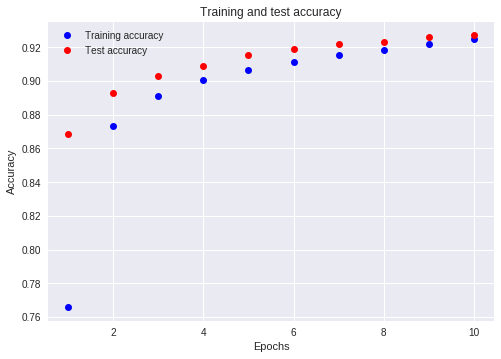

In [8]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()